In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Learning_ML/K-Means/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


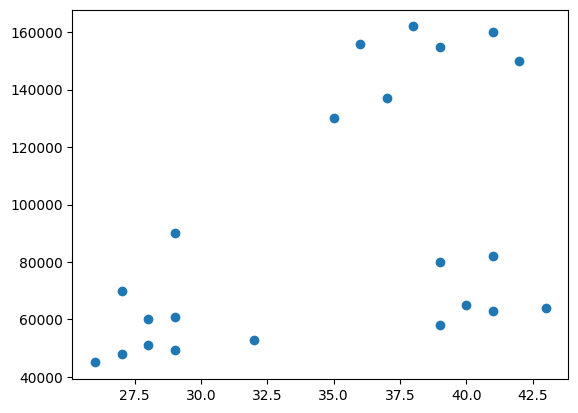

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [ ]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


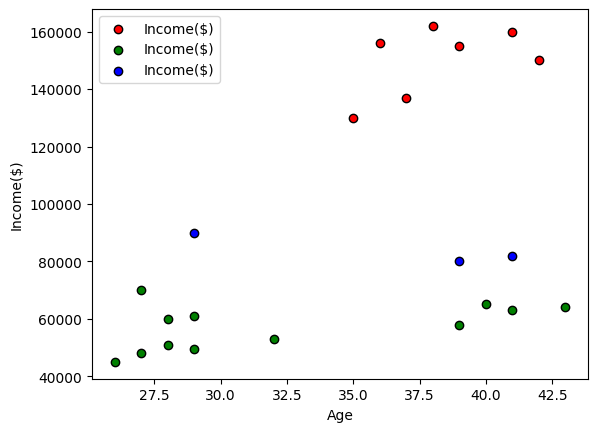

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='red', edgecolors='black', label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='green', edgecolors='black', label='Income($)')
plt.scatter(df3.Age, df3['Income($)'], color='blue', edgecolors='black', label='Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

df.Cluster = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

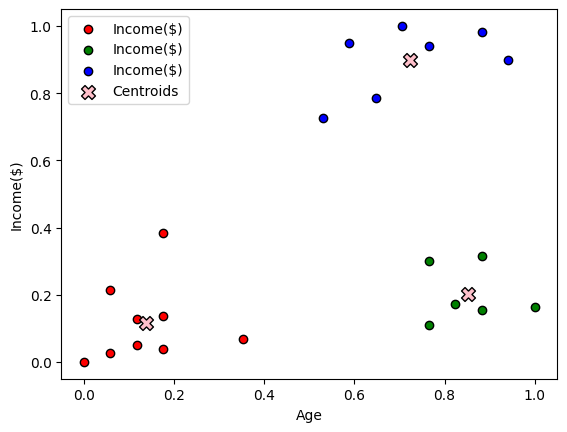

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='red', edgecolors='black', label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='green', edgecolors='black', label='Income($)')
plt.scatter(df3.Age, df3['Income($)'], color='blue', edgecolors='black', label='Income($)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='pink', edgecolors='black', marker='X', s=100, label= 'Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)


In [ ]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.28184797443662374,
 0.28246436906814076,
 0.20251788304756094,
 0.14970136993619085,
 0.10740235405674733]

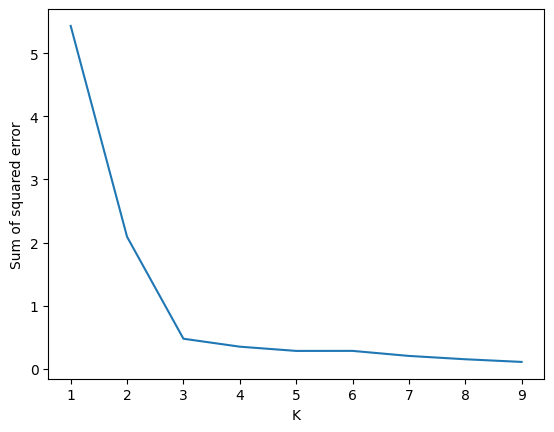

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)